# Lection8

## Deep Learning (CNN Computer Vision)



<img src="../img/cnn1.jpeg" width=600px>

[Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf)

[CNN explainer](https://poloclub.github.io/cnn-explainer/)

[Daniel Bourke github repo](https://github.com/mrdbourke/tensorflow-deep-learning/)





# Plan

1. Import TensorFlow
2. Data preparation
3. Modeling
4. Evaluation & Improving
5. Model save & load

In [1]:
#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip --no-check-certificate

# powershell command: Invoke-WebRequest -Uri https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip -OutFile pizza_steak.zip


In [2]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

main_dir="pizza_steak"


In [4]:
for dirpath, dirnames, filenames in os.walk(main_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


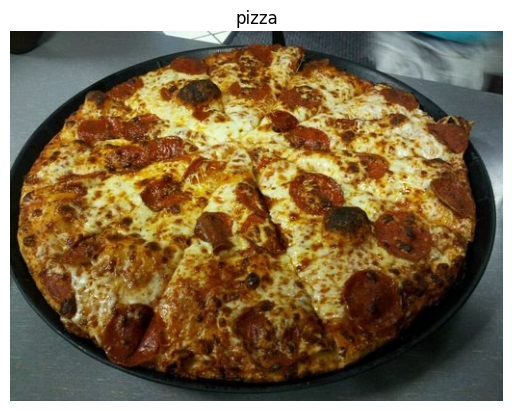

In [7]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [8]:
img

array([[[ 16,  15,  10],
        [ 19,  18,  13],
        [ 19,  18,  13],
        ...,
        [ 48,  80,  91],
        [ 48,  80,  91],
        [ 48,  80,  91]],

       [[ 17,  16,  11],
        [ 19,  18,  13],
        [ 19,  18,  13],
        ...,
        [ 49,  81,  92],
        [ 48,  80,  91],
        [ 48,  80,  91]],

       [[ 17,  17,   9],
        [ 19,  19,  11],
        [ 19,  19,  11],
        ...,
        [ 51,  83,  94],
        [ 51,  81,  91],
        [ 51,  81,  91]],

       ...,

       [[ 88, 107, 101],
        [ 88, 107, 101],
        [ 87, 106, 102],
        ...,
        [ 57,  67,  69],
        [ 56,  66,  68],
        [ 56,  66,  68]],

       [[ 85, 104,  98],
        [ 84, 103,  97],
        [ 83, 102,  98],
        ...,
        [ 57,  67,  69],
        [ 56,  66,  68],
        [ 55,  65,  67]],

       [[ 77,  96,  90],
        [ 76,  95,  89],
        [ 75,  94,  90],
        ...,
        [ 56,  66,  68],
        [ 56,  66,  68],
        [ 55,  65,  67]]

In [9]:
img/255.

array([[[0.0627451 , 0.05882353, 0.03921569],
        [0.0745098 , 0.07058824, 0.05098039],
        [0.0745098 , 0.07058824, 0.05098039],
        ...,
        [0.18823529, 0.31372549, 0.35686275],
        [0.18823529, 0.31372549, 0.35686275],
        [0.18823529, 0.31372549, 0.35686275]],

       [[0.06666667, 0.0627451 , 0.04313725],
        [0.0745098 , 0.07058824, 0.05098039],
        [0.0745098 , 0.07058824, 0.05098039],
        ...,
        [0.19215686, 0.31764706, 0.36078431],
        [0.18823529, 0.31372549, 0.35686275],
        [0.18823529, 0.31372549, 0.35686275]],

       [[0.06666667, 0.06666667, 0.03529412],
        [0.0745098 , 0.0745098 , 0.04313725],
        [0.0745098 , 0.0745098 , 0.04313725],
        ...,
        [0.2       , 0.3254902 , 0.36862745],
        [0.2       , 0.31764706, 0.35686275],
        [0.2       , 0.31764706, 0.35686275]],

       ...,

       [[0.34509804, 0.41960784, 0.39607843],
        [0.34509804, 0.41960784, 0.39607843],
        [0.34117647, 0

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 69s 1s/step - loss: 0.5639 - accuracy: 0.7120 - val_loss: 0.4332 - val_accuracy: 0.8360
Epoch 2/10
47/47 [==============================] - 65s 1s/step - loss: 0.4576 - accuracy: 0.7980 - val_loss: 0.3890 - val_accuracy: 0.8480
Epoch 3/10
47/47 [==============================] - 65s 1s/step - loss: 0.4106 - accuracy: 0.8153 - val_loss: 0.3918 - val_accuracy: 0.8080
Epoch 4/10
47/47 [==============================] - 66s 1s/step - loss: 0.3729 - accuracy: 0.8407 - val_loss: 0.3464 - val_accuracy: 0.8680
Epoch 5/10
47/47 [==============================] - 67s 1s/step - loss: 0.2939 - accuracy: 0.8800 - val_loss: 0.3209 - val_accuracy: 0.8580
Epoch 6/10
47/47 [==============================] - 66s 1s/step - loss: 0.2087 - accuracy: 0.9247 - val_loss: 0.3150 - val_accuracy: 0.8700
Epoch 7/10
47/47 [==============================] - 70s 1s/step - loss: 0.152

In [17]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

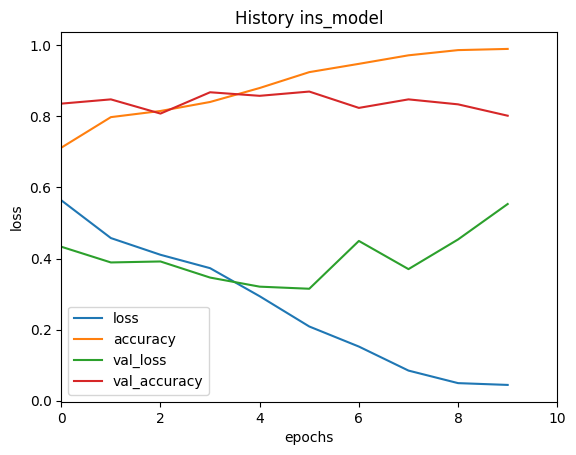

In [18]:
import pandas as pd
pd.DataFrame(history_1.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,10))

In [19]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

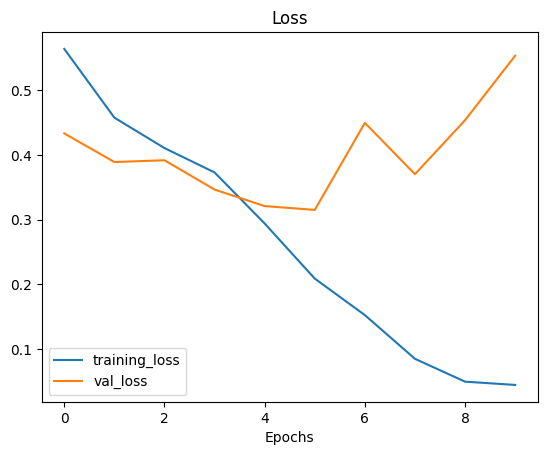

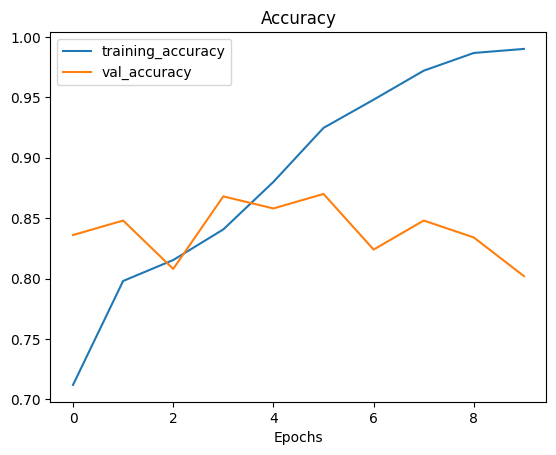

In [20]:
plot_loss_curves(history_1)

In [21]:
model_1.save('model1.h5')

c:\Users\mykro\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
